In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Load the data
store_sales = pd.read_csv("train (1).csv")
store_sales.head(10)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
5,2013-01-06,1,1,12
6,2013-01-07,1,1,10
7,2013-01-08,1,1,9
8,2013-01-09,1,1,12
9,2013-01-10,1,1,9


In [ ]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [ ]:
# Drop unnecessary columns
store_sales = store_sales.drop(['store', 'item'], axis=1)

In [ ]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   sales   913000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 13.9+ MB


In [ ]:
# Convert 'date' to datetime and aggregate monthly sales
store_sales['date'] = pd.to_datetime(store_sales['date'])
store_sales['date'] = store_sales['date'].dt.to_period("M")
monthly_sales = store_sales.groupby('date').sum().reset_index()
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()

In [ ]:
monthly_sales.head()

,date,sales
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382
3,2013-04-01,682274
4,2013-05-01,763242


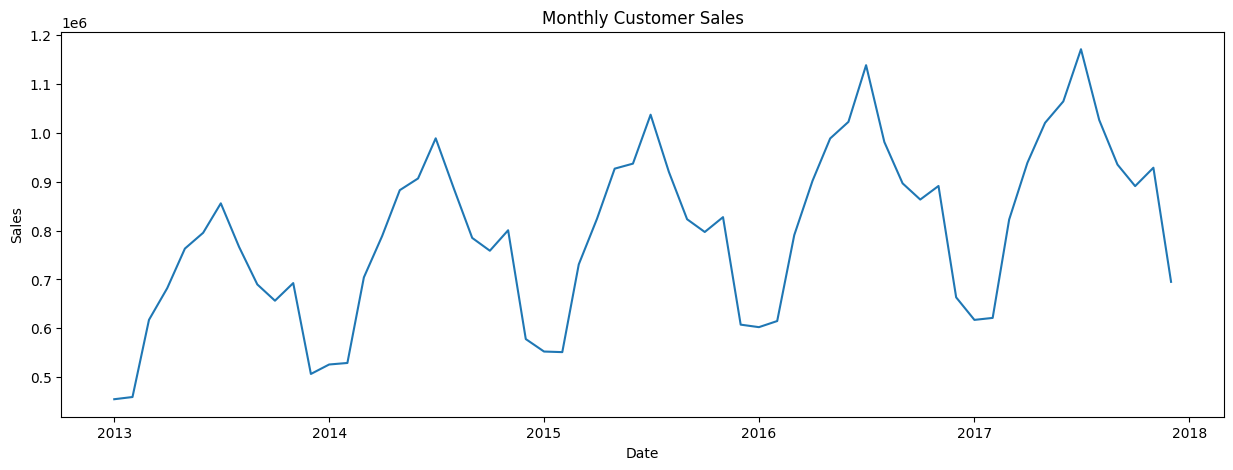

In [ ]:
# Plot monthly sales
plt.figure(figsize=(15, 5))
plt.plot(monthly_sales['date'], monthly_sales['sales'])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Customer Sales")
plt.show()

In [ ]:
# Create a column for sales differences
monthly_sales['sales_diff'] = monthly_sales['sales'].diff()
monthly_sales = monthly_sales.dropna()

In [ ]:
monthly_sales.head(10)

,date,sales,sales_diff
1,2013-02-01,459417,4513.0
2,2013-03-01,617382,157965.0
3,2013-04-01,682274,64892.0
4,2013-05-01,763242,80968.0
5,2013-06-01,795597,32355.0
6,2013-07-01,855922,60325.0
7,2013-08-01,766761,-89161.0
8,2013-09-01,689907,-76854.0
9,2013-10-01,656587,-33320.0
10,2013-11-01,692643,36056.0


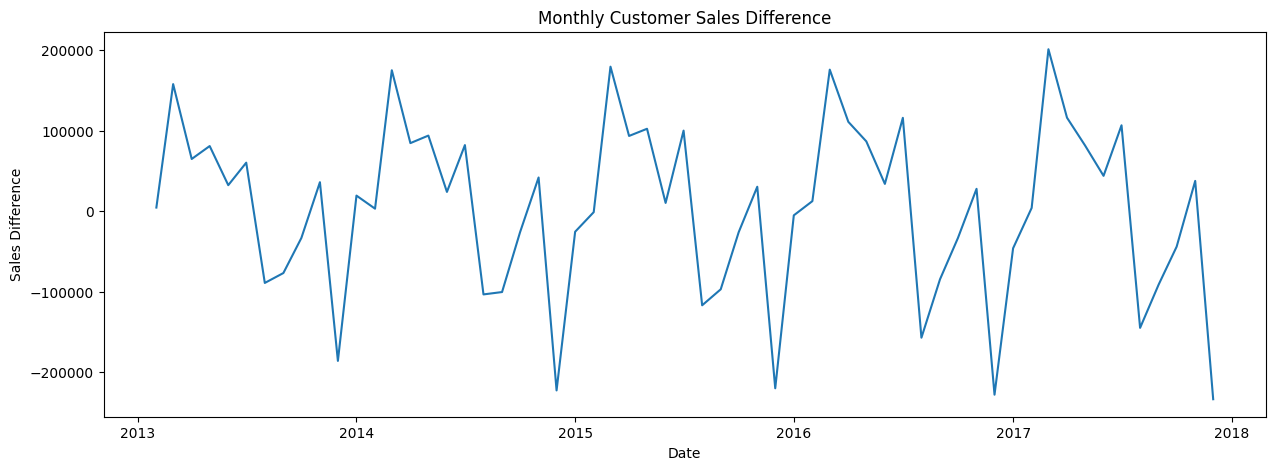

In [ ]:
# Plot monthly sales differences
plt.figure(figsize=(15, 5))
plt.plot(monthly_sales['date'], monthly_sales['sales_diff'])
plt.xlabel("Date")
plt.ylabel("Sales Difference")
plt.title("Monthly Customer Sales Difference")
plt.show()

In [ ]:
supervised_data = monthly_sales.drop(['date', 'sales'], axis=1)

In [ ]:
# it creates lag feature for sales difference column
for i in range(1, 13):
    col_name = 'month_' + str(i)
    supervised_data[col_name] = supervised_data['sales_diff'].shift(i)
supervised_data = supervised_data.dropna().reset_index(drop=True)
supervised_data.head(10)

,sales_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0,4513.0
1,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0
2,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0
3,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0
4,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0
5,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0
6,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0
7,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0
8,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0
9,41900.0,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0


In [ ]:
# Split data into train and test sets
train_data = supervised_data[:-12]
test_data = supervised_data[-12:]
print("Train Data Shape: ", train_data.shape)
print("Test Data Shape: ",test_data.shape)

Train Data Shape:  (35, 13)
Test Data Shape:  (12, 13)


In [ ]:
# Normalize data
scalar = MinMaxScaler(feature_range=(-1, 1))
scalar.fit(train_data)
train_data = scalar.transform(train_data)
test_data = scalar.transform(test_data)

In [ ]:
# Prepare features and target variables
x_train, y_train = train_data[:, 1:], train_data[:, 0:1]
x_test, y_test = test_data[:, 1:], test_data[:, 0:1]
y_train = y_train.ravel()
y_test = y_test.ravel()
print("X_train Shape:",x_train.shape)
print("Y_train Shape:",y_train.shape)
print("X_test Shape:",x_test.shape)
print("Y_test Shape:",y_test.shape)

X_train Shape: (35, 12)
Y_train Shape: (35,)
X_test Shape: (12, 12)
Y_test Shape: (12,)


In [ ]:
# Create a DataFrame for predictions
sales_dates = monthly_sales['date'][-12:].reset_index(drop=True)
predict_df = pd.DataFrame(sales_dates)

In [ ]:
act_sales = monthly_sales['sales'][-13:].to_list()
print(act_sales)

[663411, 617306, 621369, 822667, 938862, 1020686, 1064624, 1171393, 1026403, 935263, 891160, 928837, 695170]


In [ ]:
# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions using the Random Forest model
rf_pre = rf_model.predict(x_test)

In [ ]:
# Create bins for actual and predicted values
num_bins = 3  # You can adjust the number of bins based on your requirements
bins_actual = pd.qcut(y_test, num_bins, labels=False)
bins_predicted = pd.qcut(rf_pre, num_bins, labels=False)

In [ ]:
# Display classification report
print("\nClassification Report:")
print(classification_report(bins_actual, bins_predicted))


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.75      0.75      0.75         4
           2       1.00      1.00      1.00         4

    accuracy                           0.83        12
   macro avg       0.83      0.83      0.83        12
weighted avg       0.83      0.83      0.83        12



In [ ]:
# Transform predictions back to the original scale
rf_pre_test_set = np.concatenate([rf_pre.reshape(-1, 1), x_test], axis=1)
rf_pre_test_set = scalar.inverse_transform(rf_pre_test_set)

In [ ]:
# Calculate the final predictions by adding back the original sales values
result_list = []
for index in range(0, len(rf_pre_test_set)):
    result_list.append(rf_pre_test_set[index][0] + act_sales[index])

In [ ]:
# Create a DataFrame with the Random Forest predictions
rf_pre_series = pd.Series(result_list, name="Random Forest prediction")
predict_df = predict_df.merge(rf_pre_series, left_index=True, right_index=True)
print(predict_df)

         date  Random Forest prediction
0  2017-01-01                 655230.46
1  2017-02-01                 622750.89
2  2017-03-01                 795464.08
3  2017-04-01                 924466.75
4  2017-05-01                1034796.93
5  2017-06-01                1046022.14
6  2017-07-01                1168136.47
7  2017-08-01                1043158.41
8  2017-09-01                 929010.68
9  2017-10-01                 911904.46
10 2017-11-01                 917044.87
11 2017-12-01                 719640.68


In [ ]:
# Evaluate the Random Forest model
rf_mse = np.sqrt(mean_squared_error(predict_df['Random Forest prediction'], monthly_sales['sales'][-12:]))
rf_mae = mean_absolute_error(predict_df['Random Forest prediction'], monthly_sales['sales'][-12:])
rf_r2 = r2_score(predict_df['Random Forest prediction'], monthly_sales['sales'][-12:])
print("Random Forest MSE :", rf_mse)
print("Random Forest MAE :", rf_mae)
print("Random Forest R2 :", rf_r2)

Random Forest MSE : 19216.28062750311
Random Forest MAE : 16407.40333333337
Random Forest R2 : 0.9858837084240926


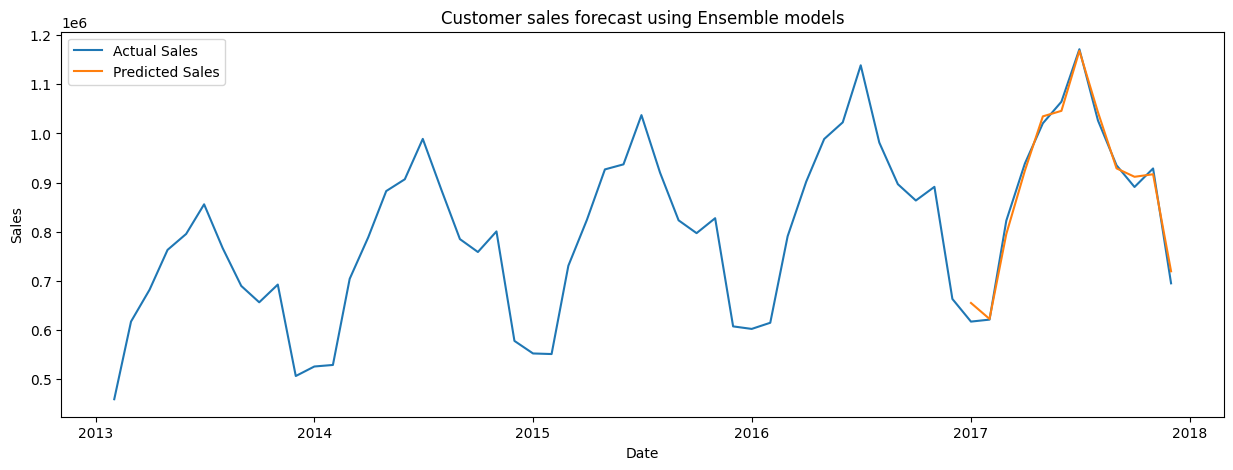

In [ ]:
# Plot the results
plt.figure(figsize=(15, 5))
# Actual sales
plt.plot(monthly_sales['date'], monthly_sales['sales'])
# Predicted sales using Linear Regression (if available)
if 'Linear prediction' in predict_df:
    plt.plot(predict_df['date'], predict_df['Linear prediction'], label='Linear Regression')
# Predicted sales using Random Forest
plt.plot(predict_df['date'], predict_df['Random Forest prediction'], label='Random forest')
plt.title("Customer sales forecast using Ensemble models")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(['Actual Sales','Predicted Sales'])
plt.show()